In [26]:
import os
import inspect
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
# parentdir = os.path.dirname(currentdir)
os.chdir(r'/RG/rg-tal/orlev/Face-Recognition-Of-Masked-Faces')
from config_file import ALL_MASKS
from helpers import get_model, read_images, get_1id_pose, resize_image, img_output_bbox, project_3d
from create_masks import masks_templates, load_3dmm

In [18]:
img_src = '/RG/rg-tal/orlev/datasets/original_ds/lfw/Raoul_Ruiz/Raoul_Ruiz_0004.jpg'
img_src = '/RG/rg-tal/orlev/datasets/original_ds/lfw/Pierre_Gagnon/Pierre_Gagnon_0001.jpg'

In [19]:
masks_to_create = masks_templates(ALL_MASKS)


# Get img2pose model
model, transform = get_model()
img = plt.imread(img_src, 1)
results = model.predict([transform(img)])[0]
pose, bbox = get_1id_pose(results, img, 0)

Model will use 1 GPUs!


In [27]:
r_img, scale_factor = resize_image(img, bbox)

# output image selected area
output_bbox = img_output_bbox(img, bbox, 0.25, True)

# project 3D face according to pose
df_3dh = project_3d(r_img, pose)

verts, vertsr = load_3dmm()
x=vertsr[:,0];y=vertsr[:,1];z=vertsr[:,2];

Text(0.5, 0, '(c)')

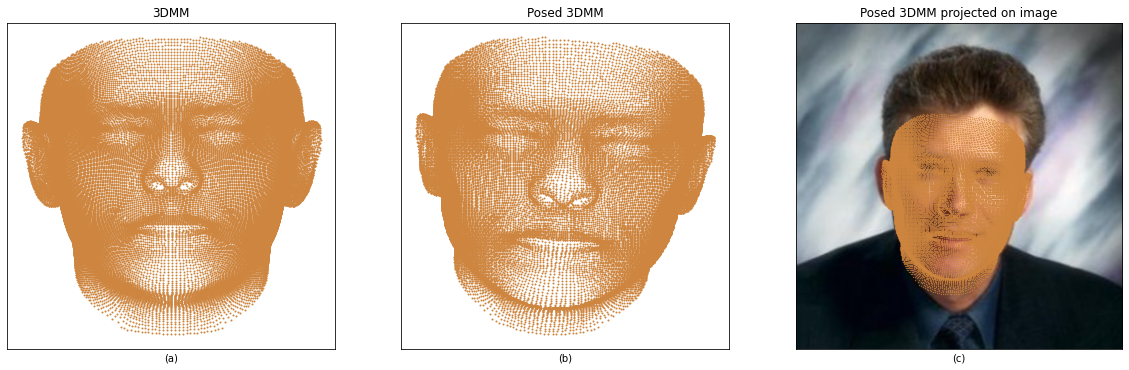

In [82]:
legend_loc = "lower left"
rows,cols = 1, 3
fig, axis = plt.subplots(rows,cols,figsize=(20,6))
face_color = 'peru'

axis[0].set_title('3DMM')
axis[0].scatter(x,y,s=1, color=face_color)
axis[0].tick_params(axis='both',bottom=False, labelbottom=False,left=False, labelleft=False)
axis[0].set_xlabel('(a)')

axis[1].set_title('Posed 3DMM')
axis[1].scatter(df_3dh['x'].to_numpy(), -df_3dh['y'].to_numpy(), s=1, color=face_color)
axis[1].tick_params(axis='both',bottom=False, labelbottom=False,left=False, labelleft=False)
axis[1].set_xlabel('(b)')

axis[2].set_title('Posed 3DMM projected on image')
axis[2].imshow(r_img)
axis[2].scatter(df_3dh['x'].to_numpy(), df_3dh['y'].to_numpy(), s=0.1, color=face_color)
axis[2].tick_params(axis='both',bottom=False, labelbottom=False,left=False, labelleft=False)
axis[2].set_xlabel('(c)')
